In [128]:
import pandas as pd       
import os 
import math 
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd
import librosa
import librosa.display

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
cd /content/drive/MyDrive/Colab Notebooks/졸업작품/EnglishSpeechAccentAnalyzer

/content/drive/MyDrive/Colab Notebooks/졸업작품/EnglishSpeechAccentAnalyzer


In [131]:
#load the data 
df = pd.read_csv("speakers.csv", header=0)

# Check the data
print(df.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df.head())

(2172, 10) is the shape of the dataset
------------------------
    age  age_onset                       birthplace filename native_language  \
0  25.0       13.0  kabul, zoroastrian, afghanistan    dari1            dari   
1  55.0       12.0               kabul, afghanistan    dari2            dari   
2  20.0       12.0               kabul, afghanistan    dari3            dari   
3  59.0       13.0               kabul, afghanistan    dari4            dari   
4  56.0       32.0               kabul, afghanistan    dari5            dari   

      sex  speakerid      country  file_missing? continent  
0  female         56  afghanistan          False      asia  
1    male        642  afghanistan          False      asia  
2    male        968  afghanistan          False      asia  
3    male       1754  afghanistan          False      asia  
4  female       1868  afghanistan          False      asia  


In [5]:
print(df.columns)

Index(['age', 'age_onset', 'birthplace', 'filename', 'native_language', 'sex',
       'speakerid', 'country', 'file_missing?', 'continent'],
      dtype='object')


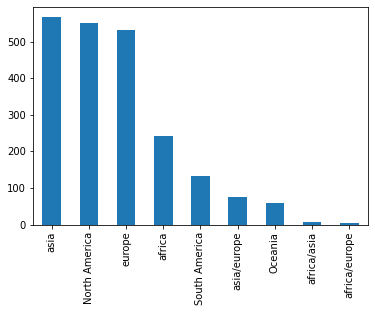

In [ ]:
df['continent'].value_counts().plot(kind='bar')

In [ ]:
df.groupby("continent")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
asia,566.0,32.270318,12.656499,18.0,23.0,28.0,39.00,81.0
North America,550.0,34.853636,17.133435,6.0,21.0,29.0,46.00,90.0
europe,533.0,32.023452,14.638498,18.0,21.0,26.0,38.00,97.0
africa,241.0,35.753112,11.745666,15.5,26.0,35.0,44.00,65.0
South America,133.0,32.639098,13.700994,17.0,22.0,29.0,39.00,80.0
asia/europe,75.0,28.920000,11.301471,18.0,23.0,25.0,31.00,68.0
Oceania,59.0,31.440678,11.109597,18.0,22.5,28.0,38.00,60.0
africa/asia,6.0,35.666667,14.935417,18.0,26.5,34.0,41.50,60.0
africa/europe,4.0,51.750000,12.175796,36.0,46.5,53.0,58.25,65.0


In [ ]:
# file_missing
df.groupby("file_missing?")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
file_missing?,,,,,,,,
False,2140.0,33.080607,14.444245,0.0,22.0,28.0,41.0,97.0
True,32.0,35.562500,15.063173,18.0,24.0,35.0,42.0,73.0


In [ ]:
import os

In [ ]:
# Count the total audio files given
print (len([name for name in os.listdir('../archive/recordings/recordings') if os.path.isfile(os.path.join('../archive/recordings/recordings', name))]))

2138


In [ ]:
# filename column. This time we just print out the first 10 records. 
df.groupby("filename")['age'].describe().sort_values(by=['count'],ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
filename,,,,,,,,
haitian,6.0,36.333333,13.952300,18.0,25.75,41.0,42.75,54.0
swiss,5.0,30.200000,8.318654,21.0,24.00,30.0,34.00,42.0
nicaragua,4.0,37.000000,12.569805,20.0,32.75,39.0,43.25,50.0
jamaican,3.0,36.333333,28.307832,19.0,20.00,21.0,45.00,69.0
liberian,2.0,33.000000,7.071068,28.0,30.50,33.0,35.50,38.0
hawai'i,2.0,71.000000,2.828427,69.0,70.00,71.0,72.00,73.0
afrikaans1,1.0,27.000000,NaN,27.0,27.00,27.0,27.00,27.0
mandarin46,1.0,43.000000,NaN,43.0,43.00,43.0,43.00,43.0
mandarin42,1.0,47.000000,NaN,47.0,47.00,47.0,47.00,47.0


영국

In [8]:
fname1 = '../archive/recordings/recordings/' + 'english11.mp3'
ipd.Audio(fname1)

미국

In [12]:
fname2 = '../archive/recordings/recordings/' + 'english10.mp3'
ipd.Audio(fname2)

In [ ]:
fname3 = '../archive/recordings/recordings/' + 'vietnamese10.mp3'
ipd.Audio(fname3)

# Librosa

Librosa 라이브러리는 음성 데이터를 다루는 대표적인 라이브러리

간단하게 wav 파일을 불러와서 파형을 직접 가공할 수도 있고, FFT나 MFCC 등 다양한 형태로 변환하는 기능들도 제공

In [6]:
import librosa
import librosa.display

import IPython.display as ipd
import matplotlib.pyplot as plt

In [ ]:
ipd.Audio(fname1)

**waveform**

y, sr = librosa.load(audio_path, sr=16000)
- y: 파형의 amplitude(진폭) 값. 1차원 numpy float array. 소리가 떨리는 세기(진폭)를 시간 순서대로 나열한 것
- sr: sampling rate(초당 샘플 갯수). default 값은 22050Hz. 단위 1초당 Hz

In [9]:
y, sr = librosa.load(fname1)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
print(y)
print(len(y))
print('Sampling rate(Hz):%d' %sr)
print('Audio length(seconds): %.2f'%(len(y)/sr))

[ 0.00353217  0.00519242  0.0048619  ... -0.00131373 -0.0012896
  0.        ]
461222
Sampling rate(Hz):22050
Audio length(seconds): 20.92


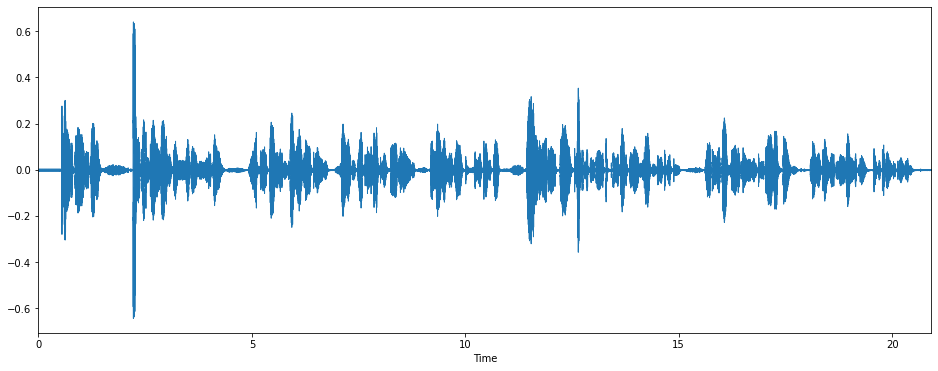

In [ ]:
plt.figure(figsize=(16,6))
librosa.display.waveplot(y=y, sr=sr)
plt.show()

In [13]:
y, sr = librosa.load(fname2)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
print(y)
print(len(y))
print('Sampling rate(Hz):%d' %sr)
print('Audio length(seconds): %.2f'%(len(y)/sr))

[-0.00648529 -0.00984094 -0.00836335 ...  0.01153128  0.01419185
  0.        ]
475680
Sampling rate(Hz):22050
Audio length(seconds): 21.57


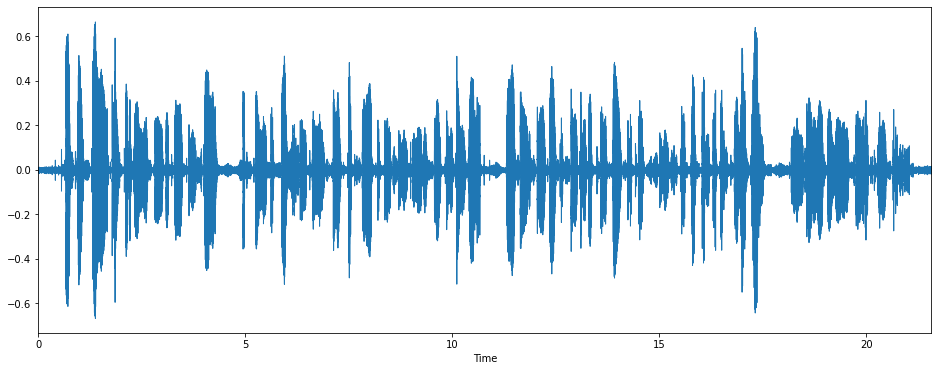

In [ ]:
plt.figure(figsize=(16,6))
librosa.display.waveplot(y=y, sr=sr)
plt.show()

In [ ]:
y, sr = librosa.load(fname3)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
print(y)
print(len(y))
print('Sampling rate(Hz):%d' %sr)
print('Audio length(seconds): %.2f'%(len(y)/sr))

[-0.00020476 -0.00125973 -0.00095896 ... -0.00436103 -0.0023478
 -0.0021992 ]
1040636
Sampling rate(Hz):22050
Audio length(seconds): 47.19


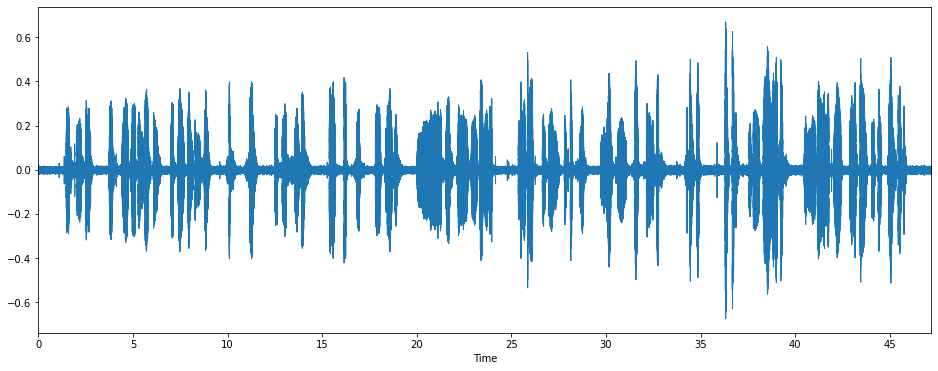

In [ ]:
plt.figure(figsize=(16,6))
librosa.display.waveplot(y=y, sr=sr)
plt.show()

**Fourier Transform(푸리에 변환)**

시간 영역 데이터를 주파수 영역으로 변경
: time(시간) domain -> frequency(진동수) domain 변경 시 얻는 정보가 많아져 분석 용이
- y : 주파수(로그 스케일)
- color : 데시벨(진폭)

In [ ]:
#n_fft: window size
#이때, 음성의 길이를 얼마만큼으로 자를 것인가?를 window라고 부른다

D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))

(1025, 2033)


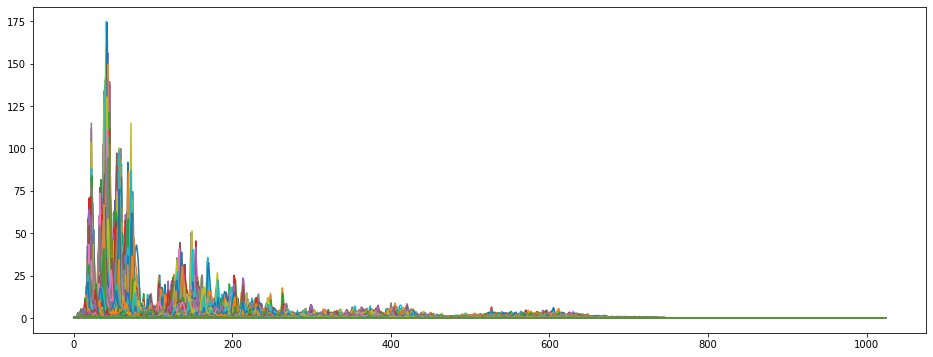

In [ ]:
print(D.shape)

plt.figure(figsize=(16,6))
plt.plot(D)
plt.show()

**chroma_stft**

In [10]:
chromagram=librosa.feature.chroma_stft(y, sr=sr, hop_length=512)

print(chromagram)

[[0.82720864 0.8266382  0.8264942  ... 0.7705748  0.6230137  0.45727333]
 [0.8943739  0.8955987  0.8959279  ... 0.50454074 0.5152667  0.3448547 ]
 [0.94815165 0.95016277 0.9507142  ... 0.661978   0.75608575 0.56973743]
 ...
 [0.84602416 0.84219635 0.8407412  ... 0.27783448 0.44918934 0.39723665]
 [0.77030355 0.7650731  0.7632231  ... 0.5080661  0.46160436 0.39953995]
 [0.7570716  0.750079   0.74752116 ... 1.         0.44986895 0.40040874]]


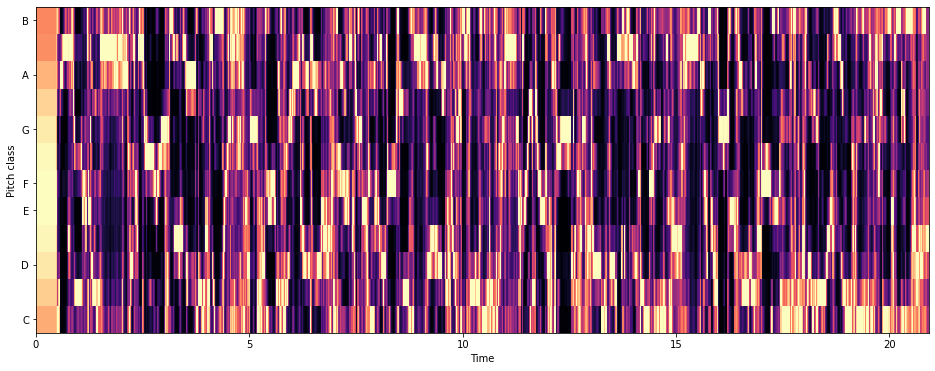

In [11]:
plt.figure(figsize=(16,6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512)
plt.show()

In [14]:
chromagram=librosa.feature.chroma_stft(y, sr=sr, hop_length=512)

print(chromagram)

[[0.7970509  0.649948   0.49338123 ... 0.661691   0.7059787  0.7808987 ]
 [0.33719957 0.3710428  0.5915008  ... 0.634484   0.6172338  0.729389  ]
 [0.21674892 0.34783033 0.7656683  ... 0.5816573  0.59505796 0.9159324 ]
 ...
 [0.3641447  0.5875158  0.77922976 ... 0.7637765  0.8023148  0.6852769 ]
 [0.38704973 0.9408514  1.         ... 1.         1.         0.73712444]
 [1.         1.         0.90750474 ... 0.8411414  0.90754026 1.        ]]


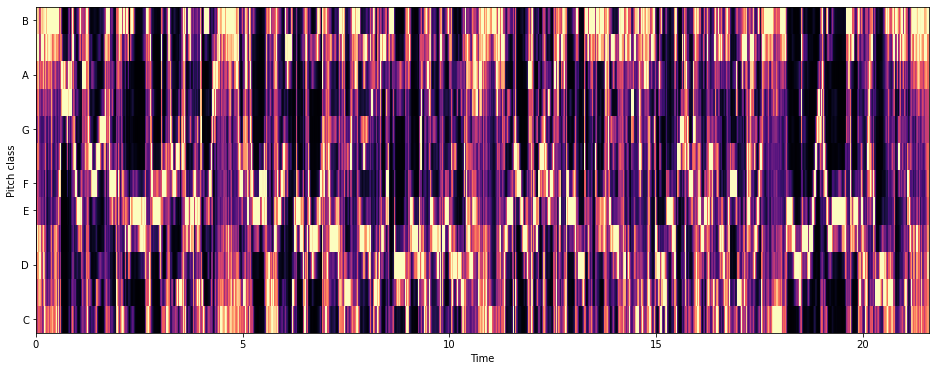

In [15]:
plt.figure(figsize=(16,6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512)
plt.show()

In [16]:
print(chromagram.mean())

0.39675373


In [17]:
print(chromagram.var())

0.09783229


**spectral centroid**

소리를 주파수로 표현했을 때, 주파수의 가중평균을 계산하여 소리의 "무게중심"이 어딘지를 알려주는 지표

In [18]:
spectral_centroids=librosa.feature.spectral_centroid(y, sr=sr)

In [21]:
print(spectral_centroids.mean())

1873.7345578253407


**Spectral Rolloff**

신호 모양을 측정한다
총 스펙트럴 에너지 중 낮은 주파수(85% 이하)에 얼마나 많이 집중되어 있는가

In [22]:
spectral_rolloff=librosa.feature.spectral_rolloff(y, sr=sr)

print(spectral_rolloff.mean())

3580.1612903225805


In [23]:
spectral_bandwidth = librosa.feature.spectral_bandwidth(y, sr=sr)
print(spectral_bandwidth.mean())

1934.5422340489704


**Mel-Frequency Cepstral Coefficients(MFCCs)**

특징들의 작은 집합(약 10-20)으로 스펙트럴 포곡선의 전체적인 모양을 축약하여 보여줌

In [24]:
mfccs=librosa.feature.mfcc(y, sr=sr)

In [33]:
print(mfccs[19].mean())

-1.3830566


**zero_crossing_rate**

In [35]:
zero_crossing_rate=librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=512, center=True)

In [37]:
print(zero_crossing_rate.mean())

0.09894573252688173


**harmonic**

In [39]:
harmonic = librosa.effects.harmonic(y)

In [41]:
print(harmonic.mean())

-4.263852e-06


**tempo**

In [42]:
tempo = librosa.beat.tempo(y, sr=sr)
print(tempo)

[117.45383523]


# 분류 알고리즘

### 음성 분석 필요 column

- length
- chroma_stft_mean
- chroma_stft_var
- rms_mean
- rms_var
- spectral_centroid_mean
- spectral_centroid_var
- spectral_bandwidth_mean
- spectral_brandwidth_var

fname3 = '../archive/recordings/recordings/' + 'vietnamese10.mp3'


In [75]:
df['tempo']

0        
1        
2        
3        
4        
       ..
2162     
2163     
2164     
2165     
2166     
Name: tempo, Length: 2135, dtype: object

In [138]:
df.insert(10, "chroma_stft_mean", "")

In [139]:
df.insert(11, "chroma_stft_var", "")
df.insert(12, "spectral_centroid_mean", "")
df.insert(13, "spectral_centroid_var", "")
df.insert(14, "spectral_bandwidth_mean", "")
df.insert(15, "spectral_bandwidth_var", "")
df.insert(16, "rolloff_mean", "")
df.insert(17, "rolloff_var", "")
df.insert(18, "zero_crossing_rate_mean", "")
df.insert(19, "zero_crossing_rate_var", "")
df.insert(20, "harmony_mean", "")
df.insert(21, "harmony_var","")
df.insert(22, "tempo", "")

In [140]:
df.insert(23, "mfcc1_mean", "")
df.insert(24, "mfcc1_var", "")
df.insert(25, "mfcc2_mean", "")
df.insert(26, "mfcc2_var", "")
df.insert(27, "mfcc3_mean", "")
df.insert(28, "mfcc3_var", "")
df.insert(29, "mfcc4_mean", "")
df.insert(30, "mfcc4_var", "")
df.insert(31, "mfcc5_mean", "")
df.insert(32, "mfcc5_var", "")
df.insert(33, "mfcc6_mean", "")
df.insert(34, "mfcc6_var", "")
df.insert(35, "mfcc7_mean", "")
df.insert(36, "mfcc7_var", "")
df.insert(37, "mfcc8_mean", "")
df.insert(38, "mfcc8_var", "")
df.insert(39, "mfcc9_mean", "")
df.insert(40, "mfcc9_var", "")
df.insert(41, "mfcc10_mean", "")
df.insert(42, "mfcc10_var", "")
df.insert(43, "mfcc11_mean", "")
df.insert(44, "mfcc11_var", "")

In [141]:
df.insert(45, "mfcc12_mean", "")
df.insert(46, "mfcc12_var", "")
df.insert(47, "mfcc13_mean", "")
df.insert(48, "mfcc13_var", "")
df.insert(49, "mfcc14_mean", "")
df.insert(50, "mfcc14_var", "")
df.insert(51, "mfcc15_mean", "")
df.insert(52, "mfcc15_var", "")
df.insert(53, "mfcc16_mean", "")
df.insert(54, "mfcc16_var", "")
df.insert(55, "mfcc17_mean", "")
df.insert(56, "mfcc17_var", "")
df.insert(57, "mfcc18_mean", "")
df.insert(58, "mfcc18_var", "")
df.insert(59, "mfcc19_mean", "")
df.insert(60, "mfcc19_var", "")
df.insert(61, "mfcc20_mean", "")
df.insert(62, "mfcc20_var", "")

In [108]:
for row in df:
  print(row)

age
age_onset
birthplace
filename
native_language
sex
speakerid
country
file_missing?
continent
chroma_stft_mean
chroma_stft_var
spectral_centroid_mean
spectral_centroid_var
spectral_bandwidth_mean
spectral_bandwidth_var
rolloff_mean
rolloff_var
zero_crossing_rate_mean
zero_crossing_rate_var
harmony_mean
harmony_var
tempo
mfcc1_mean
mfcc1_var
mfcc2_mean
mfcc2_var
mfcc3_mean
mfcc3_var
mfcc4_mean
mfcc4_var
mfcc5_mean
mfcc5_var
mfcc6_mean
mfcc6_var
mfcc7_mean
mfcc7_var
mfcc8_mean
mfcc8_var
mfcc9_mean
mfcc9_var
mfcc10_mean
mfcc10_var
mfcc11_mean
mfcc11_var
mfcc12_mean
mfcc12_var
mfcc13_mean
mfcc13_var
mfcc14_mean
mfcc14_var
mfcc15_mean
mfcc15_var
mfcc16_mean
mfcc16_var
mfcc17_mean
mfcc17_var
mfcc18_mean
mfcc18_var
mfcc19_mean
mfcc19_var
mfcc20_mean
mfcc20_var


In [112]:
df.head()

AttributeError: ignored

In [144]:
import warnings
warnings.filterwarnings(action='ignore')

In [147]:
count=1
for idx, row in df.iterrows():
  if idx<1502:
    continue
  fname='../archive/recordings/recordings/'+ row['filename'] +'.mp3'
  y, sr = librosa.load(fname)
  print(idx)
  print(fname)

  #chroma_stft
  chromagram=librosa.feature.chroma_stft(y, sr=sr, hop_length=512)
  df['chroma_stft_mean'][idx] = chromagram.mean()
  df['chroma_stft_var'][idx] = chromagram.var()

  #spectral_centroid
  spectral_centroids=librosa.feature.spectral_centroid(y, sr=sr)
  df['spectral_centroid_mean'][idx]=spectral_centroids.mean()
  df['spectral_centroid_var'][idx]=spectral_centroids.var()

  #spectral_bandwidth
  spectral_bandwidth = librosa.feature.spectral_bandwidth(y, sr=sr)
  df['spectral_bandwidth_mean'][idx]=spectral_bandwidth.mean()
  df['spectral_bandwidth_var'][idx]=spectral_bandwidth.var()

  #rolloff
  spectral_rolloff=librosa.feature.spectral_rolloff(y, sr=sr)
  df['rolloff_mean'][idx]=spectral_rolloff.mean()
  df['rolloff_var'][idx]=spectral_rolloff.var()

  #zero_crossing_rate
  zero_crossing_rate=librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=512, center=True)
  df['zero_crossing_rate_mean'][idx]=zero_crossing_rate.mean()
  df['zero_crossing_rate_var'][idx]=zero_crossing_rate.var()

  #harmony
  harmonic = librosa.effects.harmonic(y)
  df['harmony_mean'][idx]=harmonic.mean()
  df['harmony_var'][idx]=harmonic.var()

  #tempo
  tempo = librosa.beat.tempo(y, sr=sr)
  df['tempo'][idx]=tempo

  #mfcc
  mfccs=librosa.feature.mfcc(y, sr=sr)
  for i in range(1, 21):
    mean_name = 'mfcc'+str(i)+'_mean'
    mean_var = 'mfcc'+str(i)+'_var'
    df[mean_name][idx] = mfccs[i-1].mean()
    df[mean_var][idx] = mfccs[i-1].var()
  
  df.to_csv('../speakers2.csv', sep=',')
  

1502
../archive/recordings/recordings/arabic69.mp3
1503
../archive/recordings/recordings/bari1.mp3
1504
../archive/recordings/recordings/bari2.mp3
1505
../archive/recordings/recordings/dinka1.mp3
1506
../archive/recordings/recordings/nuer1.mp3
1507
../archive/recordings/recordings/shilluk1.mp3
1508
../archive/recordings/recordings/swedish1.mp3
1509
../archive/recordings/recordings/swedish10.mp3
1510
../archive/recordings/recordings/swedish12.mp3
1511
../archive/recordings/recordings/swedish13.mp3
1512
../archive/recordings/recordings/swedish14.mp3
1513
../archive/recordings/recordings/swedish15.mp3
1514
../archive/recordings/recordings/swedish16.mp3
1515
../archive/recordings/recordings/swedish17.mp3
1516
../archive/recordings/recordings/swedish18.mp3
1517
../archive/recordings/recordings/swedish2.mp3
1518
../archive/recordings/recordings/swedish20.mp3
1519
../archive/recordings/recordings/swedish3.mp3
1520
../archive/recordings/recordings/swedish4.mp3
1521
../archive/recordings/record

In [148]:
df1 = pd.read_csv("../speakers.csv", header=0)
df2 = pd.read_csv("../speakers2.csv", header=0)

In [149]:
data = pd.concat([df1, df2])

In [153]:
data.info()
data.to_csv("../speakers_all.csv",  sep=',')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4268 entries, 0 to 2133
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               4268 non-null   int64  
 1   age                      4268 non-null   float64
 2   age_onset                4268 non-null   float64
 3   birthplace               4268 non-null   object 
 4   filename                 4268 non-null   object 
 5   native_language          4268 non-null   object 
 6   sex                      4268 non-null   object 
 7   speakerid                4268 non-null   int64  
 8   country                  4268 non-null   object 
 9   file_missing?            4268 non-null   bool   
 10  continent                4268 non-null   object 
 11  chroma_stft_mean         3605 non-null   float64
 12  chroma_stft_var          3605 non-null   float64
 13  spectral_centroid_mean   3605 non-null   float64
 14  spectral_centroid_var   

In [ ]:
import sklearn

In [92]:
df['chroma_stft_mean']

0        
1        
2        
3        
4        
       ..
2162     
2163     
2164     
2165     
2166     
Name: chroma_stft_mean, Length: 2134, dtype: object

In [132]:
A = df[df['file_missing?']==True].index

In [133]:
df.drop(A, axis='index', inplace=True)

In [134]:
B= df[df['country'].isna()].index

In [135]:
df.drop(B, axis='index', inplace=True)

In [136]:
C=df[df['filename']=='nicaragua'].index
df.drop(C, axis='index', inplace=True)

In [103]:
df[df['native_language']=='nicaragua']

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,continent


In [71]:
df.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,continent,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,25.0,13.0,"kabul, zoroastrian, afghanistan",dari1,dari,female,56,afghanistan,False,asia,...,,,,,,,,,,
1,55.0,12.0,"kabul, afghanistan",dari2,dari,male,642,afghanistan,False,asia,...,,,,,,,,,,
2,20.0,12.0,"kabul, afghanistan",dari3,dari,male,968,afghanistan,False,asia,...,,,,,,,,,,
3,59.0,13.0,"kabul, afghanistan",dari4,dari,male,1754,afghanistan,False,asia,...,,,,,,,,,,
4,56.0,32.0,"kabul, afghanistan",dari5,dari,female,1868,afghanistan,False,asia,...,,,,,,,,,,


In [ ]:
X=df.drop(columns=['filename', 'speakerid', 'file_missing?', 'country'])

In [ ]:
Y=df['country']

In [ ]:
scaler=sklearn.preprocessing.MinMaxScaler()
np_scaled=scaler.fit_transform(X)
X=pd.DataFrame(np_scaled, columns=X.columns)
X.head()

ValueError: ignored